# 主成分分析

主成分分析主要就是将给定随机向量进行非退化映射，使变换后的变量相互无关。

这个目标等价于让协方差矩阵对角，为了取得唯一性我们还约定对角元从左上到右下从大至小排列。

显然，这个神马分析就是从特征分解里搞了几个性质给自己取了个名字。根据线性代数理论，实对称矩阵，其中包含协方差矩阵全体，存在分解

$$
\Sigma = P \Lambda P^T
$$

$P$是列特征向量组成的正交矩阵，$\Lambda$是对角特征值矩阵。由协方差矩阵半正定性，$\Lambda$没有负元。让我们姑且设$\Sigma$满秩。
所以可以直接导出以下简单的矩阵可以做到这一点。

$$
A = P^T
$$

这是因为
$$
\Sigma(AX) = A \Sigma A^T = P^T P \Lambda P^T (P^T)^T = \Lambda
$$

这么导出的特征值$\lambda$我们可以通过交换顺序（同时也改$P$的特征向量顺序）总让最大特征值在最上面。第二大特征值在第二位云云。
然而，我们还能进一步得到最大特征值同时也是所用变换被限制在正交变换中，我们能通过变换得到的最大方差的结论。

约束正交变换是为了禁止通过整数倍扩张直接增加方差（或减小，如在我们熟知的去相关标准化中将所有方差置1有时候是“扩大”了方差，
有时是“减小”了，相对于正交变换能做到的最好情况而言）。

$$
\max_{a} var(a^T X) = a^T \Sigma a \\
s.t. \\
a^T a = 1
$$

对此，我们可以从一个类似的问题中得到该问题的解

$$
\max_a \frac{a^T \Sigma a}{a^Ta}
$$

其中$\Sigma$是实对称矩阵（虽然没要求它是协方差矩阵，但它的确总可以成为某个随机向量的协方差矩阵）。$a$的解就是它的最大特征值对应的特征向量。
这是在$a$任意取值的结论，显然，如果转而研究$a$在某个约束子集上取值的结论，只需要最大值对应的特征向量依然在那个子集里，就仍然有上述结论成立。
对于$a^Ta = b$型约束而言，我们知道若$a$是$\lambda$特征值的特征向量，则$ka$也是。于是$k^2 a^T a$都是$\lambda$的特征向量。
所以这类约束中我们只是从这个$k^2$自由度中被约束到一个特定取值上，却没有带来更多的困难。

所以在满足上面那个约束下，第一特征值的特征向量仍然是其解。由类似的纯线性代数结论，再加上变换后变量不相关约束，
就可以得到其余特征向量各对应一个变换的结论。

## 方差的分配表示关系

### 特征值的和等于矩阵的迹

$$
trace(\Sigma(Y)) = trace(\Lambda) = trace(\Sigma)
$$

原变量组的直接方差和，即协方差矩阵的trace，等于变换后变量组的直接方差和（也是方差和，因为不相关），
即变换后的协方差矩阵或者说原协方差矩阵的特征值矩阵的trace或者说特征值之和。

### 原方差对特征值的线性表示

由特征分解式我们可以将$\lambda_i$以$P$与$\Sigma$的项表示。无聊的统计学家们将如同贫乏的因素分解“模型”以外从中整出一些项，并取名搞大新闻。

$$
\lambda_i = \Lambda_{ii} = \sum_{k} (P \Sigma)_{ik} P^T_{ki} = \sum_{k} ( \sum_{t} P_{it} \Sigma_{tk} ) P^T_{ki}  =
\sum_{k} \sum_{t} P_{it} P_{ik} \Sigma_{tk} 
$$

而

$$
cov(Y_i,X_j) = cov(\sum_{s=1}^n P^T_{is} X_s, X_j) = \sum_{s=1}^n P^T_{is} cov(X_s,X_j) = \sum_{s=1}^n P_{si} \Sigma_{sj}
$$

$$
\Sigma_{ij} = \sum_{t} (P\Lambda)_{it} P^T_{tj} =  \sum_{t} ( \sum_{k} P_{ik} \Lambda_{kt}) P^T_{tj} =
\sum_{t} P_{it} \Lambda_{tt} P_{jt} 
$$

$$
cov(Y_i,X_j) = \sum_{s} P_{si} \Sigma_{sj} = \sum_{s} P_{si} \sum_{t} P_{st} \Lambda_{tt} P_{jt} =
\sum_{t} ( \sum_{s} P_{si}  P_{st} ) \Lambda_{tt} P_{jt} = ( \sum_{s} P_{si} P_{si} ) \Lambda_{ii} P_{ji} = \Lambda_{ii} P_{ji} =
\lambda_i P_{ji}
$$

$$
\rho(Y_i,X_j) = \frac{cov(Y_i,X_j)}{\sqrt{Var(Y_i)Var(X_j)}} = \frac{ \lambda_i P_{ji} }{ \sqrt{\lambda_i \sigma_j } } = 
P_{ji} \sqrt{\frac{\lambda_i}{\sigma_j}} 
$$

$$
\sum_{j} (\rho(Y_i,X_j))^2 \sigma_j = \sum_{j} P_{ji}^2 \lambda_{i} = \lambda_i
$$

$\rho(Y_i,X_j)$也被称为因子负荷。这个东西的平方是各原方差对对应特征值线性表示式的系数。

既然$(\rho(Y_i,X_j))^2$表征了$X_j$方差向$Y_i$方差转移的比例，一个自然的对两阶段总方差相同的解释是，
原方方差以某个比例完全分配给变换后所有变量。而不是通过某些“分配”多过其拥有的，有的“分配”少过其拥有这种复杂情况而实现的。
换而言之，满足。

$$
\sum_{i} (\rho(Y_i,X_j))^2 =1
$$

事实上这也的确成立，这里不证明了。

既然原变量方差以一个固定比例分配给变换后所有变量，那么取变换后变量的一个子集，分配那个子集的方差比例就是一个小于等于的数。
这个东西称为这$m$个新变量（主成分）$Y_1,...,Y_m$对$X_j$的方差贡献率$v_i$

$$
v_i = \sum_{i \in C} (\rho(Y_i,X_j))^2 \le 1
$$

其中$C$是一个受限的指标集，通常用于把不重要的主成分剔除出去。

In [2]:
df <- read.csv("5-2.csv")
head(df)

地区,固定资产原值实现值...,X100元固定资产原值实现利税...,X100元资金实现利税...,X100元工业总产值实现利税...,X100元销售收入实现利税...,每吨标准煤实现工业产值.元.,每千瓦时电力实现工业产值.元.,全员劳动生产率.元.人.年.,X100元流动资金实现产值.元.
北京（1）,119.29,30.98,29.92,25.97,15.48,2178.00,3.41,21006.000,296.7
天津（2）,143.98,31.59,30.21,21.94,12.29,2852.00,4.29,20254.000,363.1
河北（3）,94.80,17.20,17.95,18.14,9.37,1167.00,2.03,12607.000,322.2
山西（4）,65.80,11.08,11.06,12.15,16.84,8.82,1.65,10166.000,284.7
内蒙（5）,54.79,9.24,9.54,16.86,6.27,894.00,1.80,7564.000,225.4
辽宁（6）,94.51,21.12,22.83,22.35,11.28,1416.00,2.36,13.386,311.7


In [9]:
df[,-1] <- scale(df[,-1])
head(df)

地区,固定资产原值实现值...,X100元固定资产原值实现利税...,X100元资金实现利税...,X100元工业总产值实现利税...,X100元销售收入实现利税...,每吨标准煤实现工业产值.元.,每千瓦时电力实现工业产值.元.,全员劳动生产率.元.人.年.,X100元流动资金实现产值.元.
北京（1）,0.4235227,1.3384055,1.5902823,1.6875560,2.239633907,0.4819713,0.9547459,1.2603707,0.04880528
天津（2）,0.9951990,1.4096492,1.6314526,0.6672280,1.065872829,1.1887578,1.8553945,1.1338443,1.20016649
河北（3）,-0.1435227,-0.2710014,-0.1090610,-0.2948679,-0.008541701,-0.5782084,-0.4576347,-0.1527883,0.49096960
山西（4）,-0.8149934,-0.9857742,-1.0872126,-1.8114349,2.740046154,-1.7927277,-0.8465511,-0.5634945,-0.15927205
内蒙（5）,-1.0699208,-1.2006732,-1.3030022,-0.6189423,-1.149187263,-0.8644884,-0.6930315,-1.0012894,-1.18752084
辽宁（6）,-0.1502374,0.1868270,0.5837373,0.7710331,0.694243146,-0.3170959,-0.1198915,-2.2717047,0.30890194


In [13]:
Sigma <- cov(df[,-1])

In [15]:
res <- eigen(Sigma)
res

-0.37555860,0.25951162,-0.01409538,0.12145469,-0.01927529,-0.2837758,0.80403680,0.09876977,-0.19881818
-0.39339581,-0.13437445,-0.08533436,0.05730250,-0.02304966,-0.3025802,-0.02295378,-0.37102150,0.76573353
-0.37525562,-0.26529409,-0.10739399,0.18191452,-0.02777244,-0.1004634,-0.23063640,-0.57513905,-0.59104451
-0.09353429,-0.71132915,-0.52228482,-0.01541895,0.03010113,0.2348652,0.22973646,0.32050326,0.02596274
-0.17455896,-0.49132744,0.80217252,-0.02011541,0.17577118,-0.1033121,0.03171373,0.20301840,-0.02121322
-0.37214945,0.16495551,-0.22461525,-0.23505167,0.34791879,-0.4313530,-0.42551973,0.47758705,-0.11101283
-0.36161646,0.22540269,0.04235059,0.04551550,0.59805009,0.6614030,0.03379598,-0.10595170,0.08411990
-0.35131608,0.05236421,0.08303925,-0.75572476,-0.47332841,0.2621377,0.01200353,-0.04071386,-0.03552335
-0.36259417,0.12675075,0.07471688,0.56549894,-0.51358846,0.2444445,-0.25232300,0.36998793,0.05480779


In [16]:
P <- res$vectors
lambda <- res$values
Lambda <- diag(lambda)
p <- length(lambda)

component <- t(P) * sqrt(matrix(rep(lambda, p),p)) * t(sqrt(matrix(rep(diag(Sigma),p),p)))

In [19]:
t(component[1:2,])

-0.9313463,0.31495049
-0.9755807,-0.16308056
-0.9305950,-0.32196827
-0.2319553,-0.86328878
-0.4328881,-0.59628861
-0.9228920,0.20019458
-0.8967712,0.27355496
-0.8712274,0.06355066
-0.8991959,0.15382823


In [21]:
component^2

8.674059e-01,9.517578e-01,0.8660069631,5.380327e-02,1.873921e-01,8.517296e-01,8.041987e-01,7.590371e-01,8.085532e-01
9.919381e-02,2.659527e-02,0.1036635646,7.452675e-01,3.555601e-01,4.007787e-02,7.483231e-02,4.038686e-03,2.366312e-02
1.385632e-04,5.078577e-03,0.0080436695,1.902432e-01,4.487762e-01,3.518623e-02,1.250873e-03,4.809070e-03,3.893424e-03
4.688308e-03,1.043602e-03,0.0105177375,7.556093e-05,1.286013e-04,1.755959e-02,6.584249e-04,1.815160e-01,1.016368e-01
7.060825e-05,1.009677e-04,0.0001465824,1.721945e-04,5.871498e-03,2.300432e-02,6.797179e-02,4.257736e-02,5.012843e-02
9.344940e-03,1.062446e-02,0.0011712287,6.401229e-03,1.238593e-03,2.159193e-02,5.076428e-02,7.974159e-03,6.934039e-03
1.882376e-02,1.534132e-05,0.0015488532,1.536790e-03,2.928528e-05,5.272226e-03,3.325712e-05,4.195395e-06,1.853823e-03
2.372943e-04,3.348401e-03,0.0080460917,2.498643e-03,1.002559e-03,5.548101e-03,2.730581e-04,4.032032e-05,3.329771e-03
9.678209e-05,1.435616e-03,0.0008553093,1.650380e-06,1.101783e-06,3.017374e-05,1.732528e-05,3.089661e-06,7.354741e-06


In [23]:
t(t(P)[1:2,])

-0.37555860,0.25951162
-0.39339581,-0.13437445
-0.37525562,-0.26529409
-0.09353429,-0.71132915
-0.17455896,-0.49132744
-0.37214945,0.16495551
-0.36161646,0.22540269
-0.35131608,0.05236421
-0.36259417,0.12675075


一个观测在新变量（主成分）的取值被称为主成分得分

In [31]:
head(t((t(P) %*% t(as.matrix(df[,-1])) )[1:2,]))

-2.8162378,-2.42574174
-3.7358316,-0.53648324
0.4868315,0.09774736
2.0219968,-0.38456978
2.9762976,0.73249650
0.4180131,-1.26764724


In [33]:
library(ggplot2)

In [36]:
df2 <- data.frame(t((t(P) %*% t(as.matrix(df[,-1])) )[1:2,]))
head(df2)

X1,X2
-2.8162378,-2.42574174
-3.7358316,-0.53648324
0.4868315,0.09774736
2.0219968,-0.38456978
2.9762976,0.73249650
0.4180131,-1.26764724


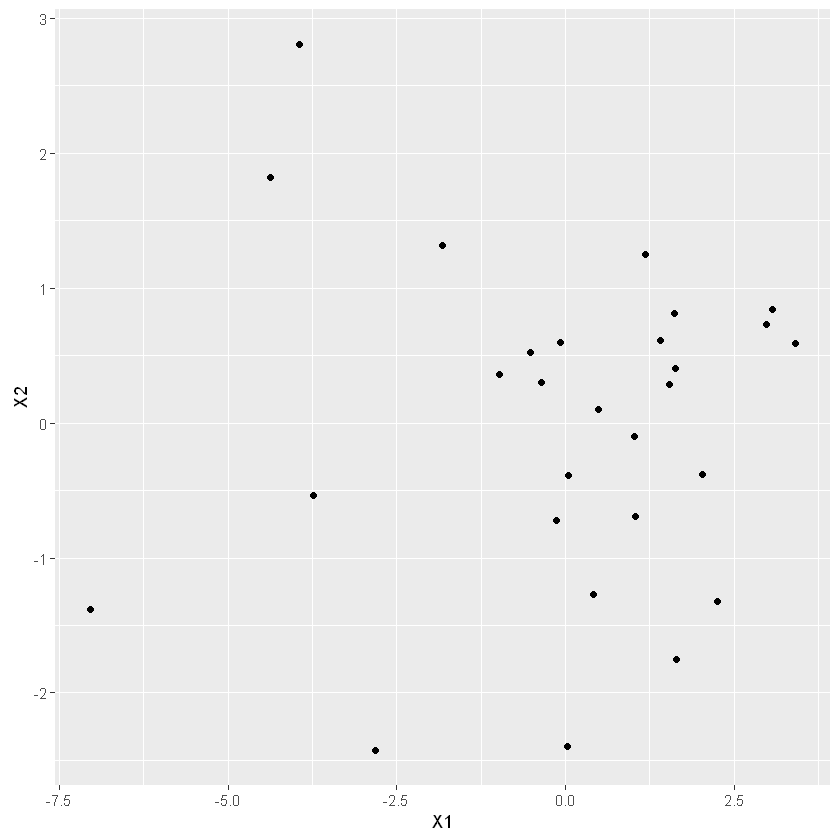

In [37]:
ggplot(df2, aes(X1,X2)) + geom_point()

In [4]:
PCA <- function(df, FULL = FALSE, extract.n = NULL, extract.p = 0.85){
    Sigma <- cov(df)
    res <- eigen(Sigma)
    
    P <- res$vectors
    lambda <- res$values
    Lambda <- diag(lambda)
    p <- length(lambda)

    component <- t(P) * sqrt(matrix(rep(lambda, p),p)) * t(sqrt(matrix(rep(diag(Sigma),p),p)))
    explain <- data.frame(total = lambda, percent = lambda/sum(lambda))
    explain$cumpercent <- cumsum(explain$percent)
    
    if(FULL){
        extract.n = p
    }
    if(is.null(extract.n)){
        extract.n <- min(which(cumsum(lambda)/sum(lambda) > extract.p))
    }
    return(list(coef = t(P)[1:extract.n,], lambda = lambda, component = component[1:extract.n,], 
                corr = cor(df), extract.n = extract.n, 
                explain = explain,
                explain.percent = sum(lambda[1:extract.n])/sum(lambda)))
}

In [68]:
PCA(df[,-1])

$coef
            [,1]        [,2]       [,3]        [,4]       [,5]       [,6]
[1,] -0.37555860 -0.39339581 -0.3752556 -0.09353429 -0.1745590 -0.3721494
[2,]  0.25951162 -0.13437445 -0.2652941 -0.71132915 -0.4913274  0.1649555
[3,] -0.01409538 -0.08533436 -0.1073940 -0.52228482  0.8021725 -0.2246153
            [,7]        [,8]        [,9]
[1,] -0.36161646 -0.35131608 -0.36259417
[2,]  0.22540269  0.05236421  0.12675075
[3,]  0.04235059  0.08303925  0.07471688

$lambda
[1] 6.149884563 1.472892257 0.697419729 0.317824658 0.190043758 0.116044860
[7] 0.029117533 0.024324239 0.002448403

$component
            [,1]        [,2]        [,3]       [,4]       [,5]       [,6]
[1,] -0.93134630 -0.97558073 -0.93059495 -0.2319553 -0.4328881 -0.9228920
[2,]  0.31495049 -0.16308056 -0.32196827 -0.8632888 -0.5962886  0.2001946
[3,] -0.01177129 -0.07126414 -0.08968651 -0.4361687  0.6699076 -0.1875799
            [,7]        [,8]        [,9]
[1,] -0.89677125 -0.87122737 -0.89919586
[2,]  0.27355496  0.06355066  0.15382823
[3,]  0.03536768  0.06934746  0.06239731

$corr
                              固定资产原值实现值...
固定资产原值实现值...                    1.00000000
X100元固定资产原值实现利税...            0.86853913
X100元资金实现利税...                    0.77029641
X100元工业总产值实现利税...             -0.05303211
X100元销售收入实现利税...                0.21070398
每吨标准煤实现工业产值.元.               0.91988779
每千瓦时电力实现工业产值.元.             0.89922598
全员劳动生产率.元.人.年.                 0.79474342
X100元流动资金实现产值.元.               0.89579206
                              X100元固定资产原值实现利税...
固定资产原值实现值...                             0.8685391
X100元固定资产原值实现利税...                     1.0000000
X100元资金实现利税...                             0.9779675
X100元工业总产值实现利税...                       0.3865031
X100元销售收入实现利税...                         0.4724181
每吨标准煤实现工业产值.元.                        0.8861828
每千瓦时电力实现工业产值.元.                      0.8038176
全员劳动生产率.元.人.年.                          0.8140452
X100元流动资金实现产值.元.                        0.8486029
                              X100元资金实现利税... X100元工业总产值实现利税...
固定资产原值实现值...                     0.7702964                 -0.05303211
X100元固定资产原值实现利税...             0.9779675                  0.38650312
X100元资金实现利税...                     1.0000000                  0.52307385
X100元工业总产值实现利税...               0.5230738                  1.00000000
X100元销售收入实现利税...                 0.5308390                  0.32306906
每吨标准煤实现工业产值.元.                0.7971451                  0.11531588
每千瓦时电力实现工业产值.元.              0.7361806                 -0.02294233
全员劳动生产率.元.人.年.                  0.7403678                  0.12487698
X100元流动资金实现产值.元.                0.8106586                  0.05071242
                              X100元销售收入实现利税...
固定资产原值实现值...                         0.2107040
X100元固定资产原值实现利税...                 0.4724181
X100元资金实现利税...                         0.5308390
X100元工业总产值实现利税...                   0.3230691
X100元销售收入实现利税...                     1.0000000
每吨标准煤实现工业产值.元.                    0.1747413
每千瓦时电力实现工业产值.元.                  0.2600375
全员劳动生产率.元.人.年.                      0.3713953
X100元流动资金实现产值.元.                    0.3172149
                              每吨标准煤实现工业产值.元.
固定资产原值实现值...                          0.9198878
X100元固定资产原值实现利税...                  0.8861828
X100元资金实现利税...                          0.7971451
X100元工业总产值实现利税...                    0.1153159
X100元销售收入实现利税...                      0.1747413
每吨标准煤实现工业产值.元.                     1.0000000
每千瓦时电力实现工业产值.元.                   0.8771158
全员劳动生产率.元.人.年.                       0.8151896
X100元流动资金实现产值.元.                     0.7679212
                              每千瓦时电力实现工业产值.元.
固定资产原值实现值...                           0.89922598
X100元固定资产原值实现利税...                   0.80381758
X100元资金实现利税...                           0.73618059
X100元工业总产值实现利税...                    -0.02294233
X100元销售收入实现利税...                       0.26003753
每吨标准煤实现工业产值.元.                      0.87711581
每千瓦时电力实现工业产值.元.                    1.00000000
全员劳动生

In [1]:
insurance <- read.csv("insurance.csv")

In [3]:
insurance

人寿保险公司,年末资产总额,年初资产总额,负债总额,所有者权益,年末保险业务总收入,年初保险业务总收入,投资收益,退保金,业务及管理费,年末利润总额,年初利润总额,资产总额,资产增长率,保费收入增长率,市场占有率,投资收益率,退保率,成本率,资产收益率
中国人民人寿,186869.05,92965.04,180083.41,6785.65,72127.30,46566.99,7677.42,2177.21,3360.00,907.29,163.28,186869.05,1.010100,0.548893,0.081984,0.106443,0.030186,0.046584,0.004855
中国人寿,1410579.00,1226257.00,1200104.00,210475.00,318229.00,275970.00,68280.00,25714.00,20917.00,41008.00,41745.00,1410579.00,0.150313,0.153129,0.361718,0.214562,0.080803,0.065729,0.029072
太平人寿,111327.94,79712.20,102190.46,9137.48,32290.79,19068.30,3961.00,1231.98,3932.38,1060.89,1028.46,111327.94,0.396624,0.693428,0.036704,0.122667,0.038153,0.121780,0.009529
民生人寿,21527.08,14257.73,17427.44,4099.64,7933.48,4759.21,706.01,575.07,1072.37,48.48,-60.65,21527.08,0.509853,0.666974,0.009018,0.088991,0.072486,0.135170,0.002252
阳光人寿,24878.23,8225.25,20254.74,4623.49,14075.88,3191.83,809.72,2399.23,1723.23,-310.61,-472.77,24878.23,2.024617,3.409972,0.015999,0.057525,0.170450,0.122424,-0.012485
太平洋人寿,378949.00,309641.00,341639.00,37310.00,87873.00,61998.00,17468.00,4489.00,7745.00,5324.00,6855.00,378949.00,0.223833,0.417352,0.099882,0.198787,0.051085,0.088139,0.014049
华泰人寿,12916.50,7333.00,11530.55,1385.95,5133.22,2478.24,401.89,78.91,613.69,-134.22,-182.54,12916.50,0.761421,1.071317,0.005835,0.078292,0.015372,0.119553,-0.010391
平安人寿,761662.52,596568.52,731044.44,30618.08,92645.01,72073.03,27079.04,3580.28,11674.24,10599.31,14237.63,761662.52,0.276739,0.285432,0.105306,0.292288,0.038645,0.126010,0.013916
新华人寿,304452.42,206560.55,297942.94,6509.48,91679.06,65040.21,10677.07,7710.23,8483.08,2223.93,2630.45,304452.42,0.473914,0.409575,0.104208,0.116461,0.084100,0.092530,0.007305
泰康人寿,293475.28,201949.88,280012.55,13462.73,65459.70,44910.13,11944.48,2516.16,8305.49,2396.84,4065.91,293475.28,0.453208,0.457571,0.074405,0.182471,0.038438,0.126879,0.008167


In [13]:
df <- scale(insurance[,c('资产总额','资产增长率','保费收入增长率','市场占有率','投资收益率','退保率','成本率','资产收益率')])

In [14]:
df

资产总额,资产增长率,保费收入增长率,市场占有率,投资收益率,退保率,成本率,资产收益率
0.3346888,1.715300229,-0.2611377,0.8813548,-0.44319075,-0.4747530653,-1.07623030,0.41768807
4.9729043,-0.681042752,-0.5470863,5.2348936,0.19113420,0.4266989574,-0.97134244,1.33907467
0.0483661,0.005459412,-0.1567078,0.1766559,-0.34800593,-0.3328665792,-0.66426128,0.59552021
-0.2920052,0.321043992,-0.1758214,-0.2542251,-0.54558015,0.2785792254,-0.59090278,0.31865147
-0.2793034,4.542896706,1.8060579,-0.1455788,-0.73018849,2.0232469447,-0.66073306,-0.24204864
1.0627275,-0.476132541,-0.3561791,1.1599039,0.09858362,-0.1025570477,-0.84856695,0.76749310
-0.3246418,1.022198128,0.1163257,-0.3037626,-0.60835027,-0.7385796505,-0.67646212,-0.16237801
2.5133227,-0.328676343,-0.4514944,1.2443183,0.64714601,-0.3241044164,-0.64108679,0.76243283
0.7803639,0.220877125,-0.3617982,1.2272300,-0.38441600,0.4854161338,-0.82451041,0.51090346
0.7387573,0.163166694,-0.3271200,0.7634018,0.00285904,-0.3277909361,-0.63632588,0.54370006


In [16]:
print(PCA(df))

$coef
            [,1]        [,2]        [,3]        [,4]        [,5]          [,6]
[1,]  0.49568806  0.04402391 -0.28287640  0.50151134 -0.02555502 -0.0004024196
[2,] -0.05673383 -0.19398087  0.18668018 -0.04594802 -0.64488380 -0.6835637471
[3,] -0.40044469  0.62581585 -0.03121841 -0.35771308 -0.13272354  0.1303964601
[4,] -0.28634481 -0.49899361 -0.67554052 -0.32404466  0.12170212 -0.1027996386
             [,7]       [,8]
[1,] -0.444087423 0.47218185
[2,] -0.196837897 0.01767247
[3,] -0.438113060 0.30414389
[4,] -0.006737263 0.28675341

$lambda
[1] 2.64828488 1.88813035 1.41644529 1.21864370 0.43320340 0.23183083 0.13656997
[8] 0.02689158

$component
            [,1]        [,2]        [,3]        [,4]        [,5]          [,6]
[1,]  0.80666054  0.07164255 -0.46034038  0.81613707 -0.04158709 -0.0006548796
[2,] -0.07795753 -0.26654766  0.25651585 -0.06313683 -0.88613003 -0.9392798551
[3,] -0.47658727  0.74481165 -0.03715444 -0.42573046 -0.15796026  0.1551907042
[4,] -0.31610233 -0.5

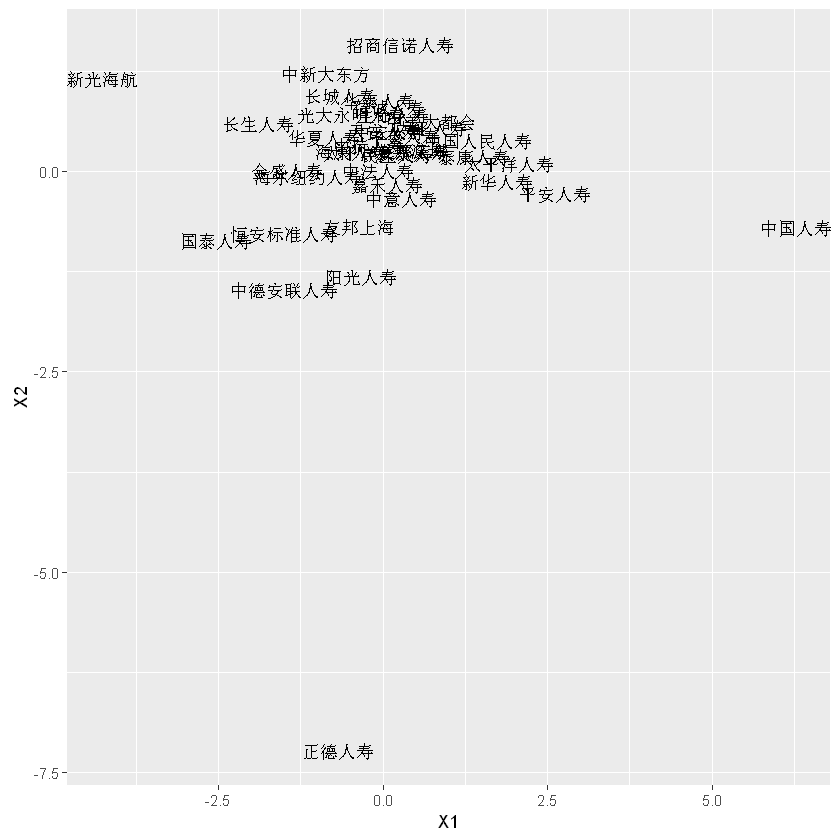

In [49]:
library(ggplot2)

res <- PCA(df)
score <- res$coef %*% t(as.matrix(df))
df2 <- data.frame(t(score[1:2,]))
ggplot(df2,aes(X1,X2,label = insurance[,'人寿保险公司'])) + geom_text()

In [51]:
examination <- read.csv("examination.csv")
examination

编号,语文,数学,英语,地理,政治,历史,化学,物理,生物,计算机,音乐,体育,美术
1,83,65,83,84,84,90,70,85,66,77,78,78,82
2,74,53,62,70,85,82,68,77,57,63,74,79,89
3,79,71,82,79,86,86,75,87,67,75,78,79,94
4,76,62,84,77,84,86,74,73,71,74,89,73,91
5,81,70,94,92,85,76,86,88,71,79,85,88,90
6,54,44,62,71,83,85,66,85,40,72,77,70,88
7,82,60,82,78,80,79,70,79,73,67,78,73,84
8,85,62,92,87,83,83,88,89,83,76,78,85,90
9,83,80,85,88,80,82,77,90,68,76,74,81,95
10,89,88,90,88,85,82,83,89,90,82,85,88,97


In [55]:
res <- PCA(scale(examination[,-1]))
print(res)

$coef
            [,1]        [,2]        [,3]        [,4]         [,5]       [,6]
[1,] -0.31381244 -0.33131877 -0.35892166 -0.36477465  0.020329262  0.2017084
[2,] -0.02502806  0.13733156 -0.01215405  0.16614043 -0.726628411 -0.1792414
[3,] -0.04997077 -0.06296683  0.15289294  0.16016587  0.001398638  0.2397796
[4,]  0.03531518 -0.09084055  0.16289604 -0.07213282 -0.220612770 -0.4874583
[5,]  0.49731457  0.11508420  0.13946569 -0.05016472  0.094736160  0.4913045
            [,7]       [,8]          [,9]        [,10]      [,11]       [,12]
[1,] -0.34757914 -0.2623962 -0.3246531947 -0.308338807 -0.2148813 -0.19196163
[2,] -0.11575541  0.2192653 -0.1617698721 -0.002551512 -0.4985270  0.12338447
[3,]  0.11130315  0.2499819 -0.0002318143  0.127591928  0.1239623 -0.63376286
[4,]  0.05591126 -0.5375879  0.1778178281 -0.258708459  0.3210596  0.05756187
[5,] -0.02115726 -0.1522143  0.3197217167 -0.360188647 -0.3514300  0.18020398
          [,13]
[1,] -0.1249239
[2,] -0.2030800
[3,] -0.6154928


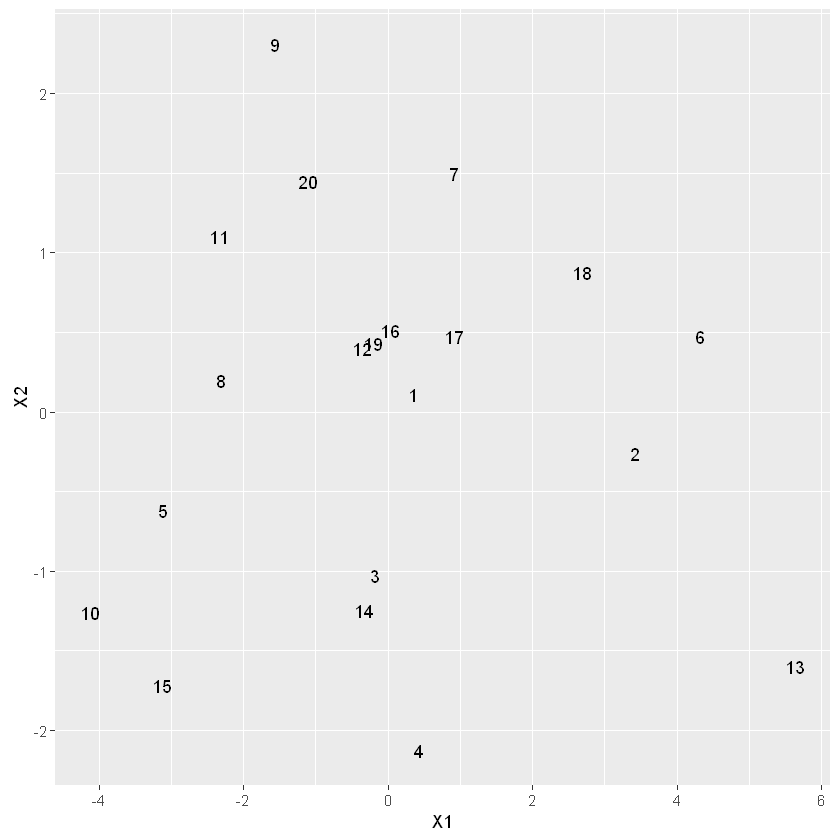

In [60]:
df <- data.frame(t(res$coef[1:2,] %*% t(as.matrix(scale(examination[,-1])))))

ggplot(df,aes(X1,X2,label = examination[,'编号']))  + geom_text()

In [62]:
industry <- read.csv("industry.csv")
industry

X,X100固定资产原值实现值...,X100元固定资产原值实现利税...,X100元资金实现利税...,X100元工业总产值实现利税...,X100元销售收入实现利税...,每吨标准煤实现工业产值.元.,每千瓦时电力实现工业产值.元.,全员劳动生产率.元.人.年.,X100元流动资金实现产值.元.
北京（1）,119.29,30.98,29.92,25.97,15.48,2178.00,3.41,21006.000,296.70
天津（2）,143.98,31.59,30.21,21.94,12.29,2852.00,4.29,20254.000,363.10
河北（3）,94.80,17.20,17.95,18.14,9.37,1167.00,2.03,12607.000,322.20
山西（4）,65.80,11.08,11.06,12.15,16.84,8.82,1.65,10166.000,284.70
内蒙（5）,54.79,9.24,9.54,16.86,6.27,894.00,1.80,7564.000,225.40
辽宁（6）,94.51,21.12,22.83,22.35,11.28,1416.00,2.36,13.386,311.70
吉林（7）,80.49,13.36,13.76,16.60,7.14,1306.00,2.07,9400.000,274.10
黑龙江（8）,75.86,15.82,16.67,20.86,10.37,1267.00,2.26,9830.000,267.00
上海（9）,187.79,45.90,39.77,24.44,15.09,4346.00,4.11,31246.000,418.60
江苏（10）,205.96,27.65,22.58,13.42,7.81,3202.00,4.69,23377.000,407.20


In [67]:
res <- PCA(scale(industry[,-1]))
print(res)

$coef
            [,1]        [,2]       [,3]        [,4]       [,5]       [,6]
[1,] -0.37555860 -0.39339581 -0.3752556 -0.09353429 -0.1745590 -0.3721494
[2,]  0.25951162 -0.13437445 -0.2652941 -0.71132915 -0.4913274  0.1649555
[3,] -0.01409538 -0.08533436 -0.1073940 -0.52228482  0.8021725 -0.2246153
            [,7]        [,8]        [,9]
[1,] -0.36161646 -0.35131608 -0.36259417
[2,]  0.22540269  0.05236421  0.12675075
[3,]  0.04235059  0.08303925  0.07471688

$lambda
[1] 6.149884563 1.472892257 0.697419729 0.317824658 0.190043758 0.116044860
[7] 0.029117533 0.024324239 0.002448403

$component
            [,1]        [,2]        [,3]       [,4]       [,5]       [,6]
[1,] -0.93134630 -0.97558073 -0.93059495 -0.2319553 -0.4328881 -0.9228920
[2,]  0.31495049 -0.16308056 -0.32196827 -0.8632888 -0.5962886  0.2001946
[3,] -0.01177129 -0.07126414 -0.08968651 -0.4361687  0.6699076 -0.1875799
            [,7]        [,8]        [,9]
[1,] -0.89677125 -0.87122737 -0.89919586
[2,]  0.27355496  0

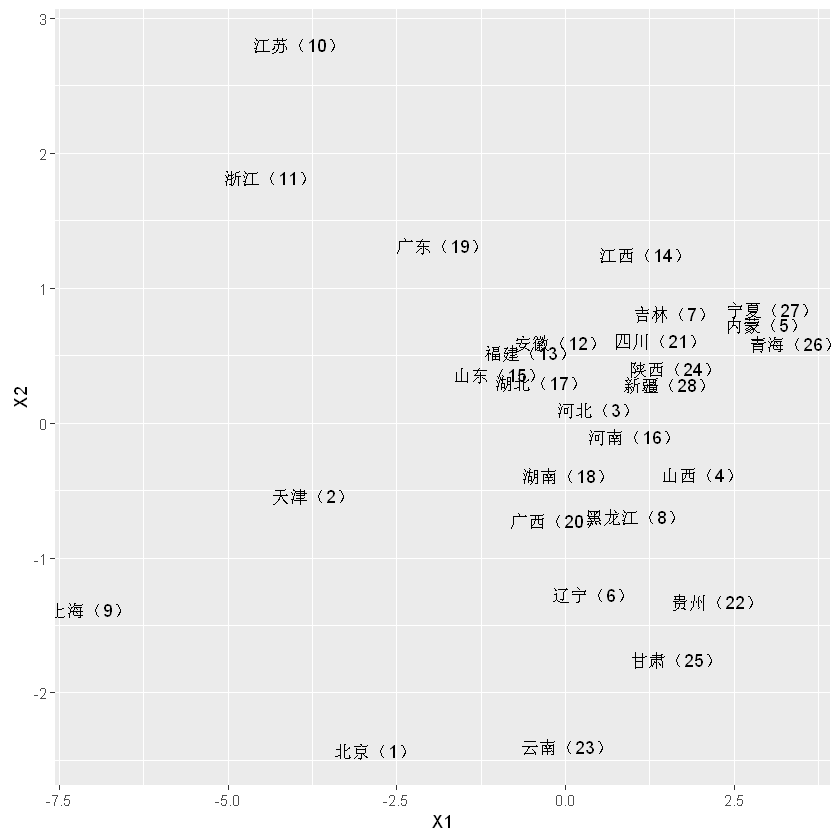

In [66]:
df <- data.frame(t(res$coef %*% t(as.matrix(scale(industry[,-1])))))

ggplot(df,aes(X1,X2,label=industry[,'X'])) + geom_text()